# Imports

In [ ]:
!pip install zoofs

  Preparing metadata (setup.py) ... done
  Created wheel for zoofs: filename=zoofs-0.1.26-py3-none-any.whl size=23602 sha256=9e1f28ae0351592263521ed77daefa41bce6f1a6ac360cc0eb2e45e267f3fa5b
  Stored in directory: /root/.cache/pip/wheels/c5/47/90/d0547288297679ffb3e38d6d5b700dab7bc0314cf677051b77
Successfully built zoofs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import numpy as np
import pandas as pd
from numpy.random import rand
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()

# Data Reading and Visualization

In [ ]:
data = arff.loadarff("/content/drive/My Drive/data/Ovarian.arff")
data = pd.DataFrame(data[0])
data.tail()


MZ-7.86E-05  MZ2.18E-07  MZ9.60E-05  MZ0.000366014  MZ0.000810195  \
248     0.569893    0.681316    0.988506       0.465117       0.690479   
249     0.569893    0.791209    0.666670       0.651163       0.785715   
250     0.688175    0.703294    0.655177       0.581398       0.726193   
251     0.838709    0.824175    0.678164       0.651163       0.809524   
252     0.795699    0.648350    0.517244       0.790699       0.595238   

     MZ0.001428564  MZ0.002221123  MZ0.003187869  MZ0.004328805  \
248       0.594937       0.642856       0.842109       0.826085   
249       0.607595       1.000000       0.578952       0.739131   
250       0.772153       0.583334       0.868424       0.768115   
251       0.835442       0.761906       0.842109       0.594200   
252       0.607595       0.678575       0.763158       0.898546   

     MZ0.005643929  ...  MZ19974.404  MZ19977.042  MZ19979.68  MZ19982.319  \
248       0.648350  ...     0.519231     0.498592    0.498592     0.498592   
249       0.648350  ...     0.462961     0.450005    0.450005     0.450005   
250       0.879119  ...     0.527779     0.519718    0.519718     0.519718   
251       0.637362  ...     0.532050     0.519718    0.519718     0.519718   
252       0.725277  ...     0.289174     0.273243    0.273243     0.273243   

     MZ19984.957  MZ19987.596  MZ19990.235  MZ19992.874  MZ19995.513  \
248     0.498592     0.498592     0.498592     0.498592     0.498592   
249     0.450005     0.450005     0.450005     0.450005     0.450005   
250     0.519718     0.519718     0.519718     0.519718     0.519718   
251     0.519718     0.519718     0.519718     0.519718     0.519718   
252     0.273243     0.273243     0.273243     0.273243     0.273243   

         Class  
248  b'Cancer'  
249  b'Cancer'  
250  b'Cancer'  
251  b'Cancer'  
252  b'Cancer'  

[5 rows x 15155 columns]

In [ ]:
len(data)

253

So we have 253 rows/samples and 15155 features.

In [ ]:
# columns
# here column "Class" is our label column
data.columns

Index(['MZ-7.86E-05', 'MZ2.18E-07', 'MZ9.60E-05', 'MZ0.000366014',
       'MZ0.000810195', 'MZ0.001428564', 'MZ0.002221123', 'MZ0.003187869',
       'MZ0.004328805', 'MZ0.005643929',
       ...
       'MZ19974.404', 'MZ19977.042', 'MZ19979.68', 'MZ19982.319',
       'MZ19984.957', 'MZ19987.596', 'MZ19990.235', 'MZ19992.874',
       'MZ19995.513', 'Class'],
      dtype='object', length=15155)

<Axes: >

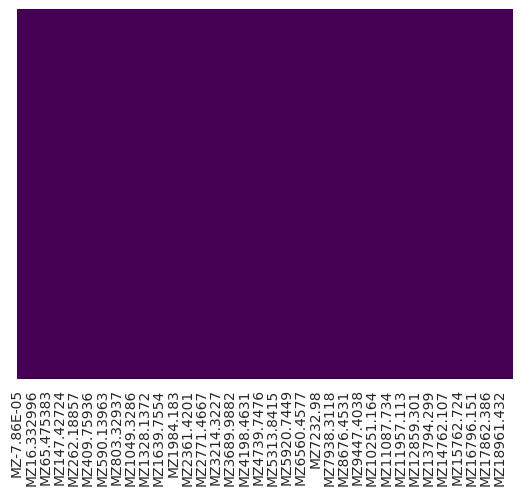

In [ ]:
# check for null vales
# there are no missing values present here..
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data['Class'].value_counts()
# we have 162 samples which are labeled as 'Cancer'
# we have 91 samples which are not affected by Cancer.

1    162
0     91
Name: Class, dtype: int64

<ipython-input-27-59717558a1e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Class', data= data,palette = 'RdBu_r')


<Axes: xlabel='Class', ylabel='count'>

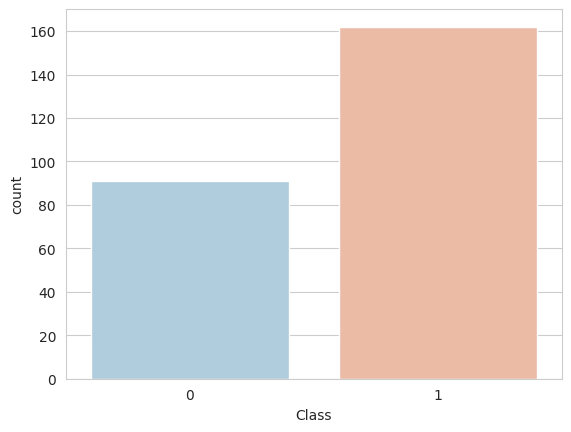

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', data= data,palette = 'RdBu_r')

In [ ]:
# class values are in byte string format but we need them in integer format
# Converting them into string first
y = data.Class  # label
def cvt(str):
  return str.decode("utf-8")

for st in range(len(y)):
  y[st] = cvt(y[st])


AttributeError: 'numpy.int64' object has no attribute 'decode'

In [ ]:
# Then convert them into integer
y.replace({"Normal": 0, "Cancer": 1}, inplace= True)

1    162
0     91
Name: Class, dtype: int64


<Axes: >

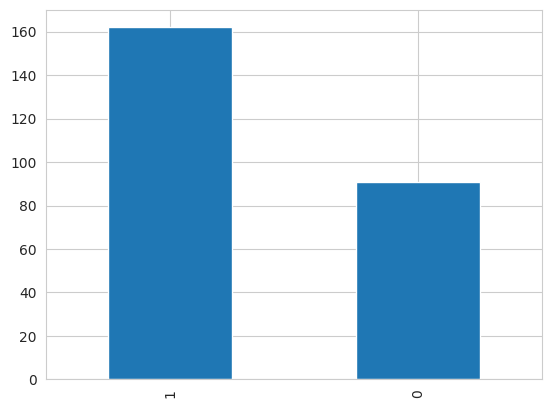

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {0: "#0392cf",
               1: "#7bc043"}
colors = data["Class"].map(lambda x: color_wheel.get(x + 1))
print(data.Class.value_counts())
data.Class.value_counts().plot(kind="bar")

In [ ]:
y = y.astype(float)

In [ ]:
# features
X = data.drop(['Class'], axis=1)

In [ ]:
# convert numpy array to dictionary
col_dict = dict(enumerate((X.columns.to_numpy()).flatten(), 0))

In [ ]:
cols = (data.columns).to_list()
len(cols)

15155

In [ ]:
len(col_dict)

15154

# Utils

In [ ]:
# here X is features and y is labels
# k is the num_ of splits usally k = 3, k =5, or k = 10
def kfold(k, model, X, y):

  # prepare the cross-validation procedure
  cv = KFold(n_splits=k, random_state=1, shuffle=True)  # 10-fold cross-validation
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report performance
  acc = mean(scores)

  return acc, scores.min(), scores.max()

def k_evaluate(k,model,x , y):
  acc_list = {}
  for i in range(2, k+1):
    acc,_,_ = kfold(i, model, x, y)
    acc_list.update( {i : acc} )
    print(f"for fold: {i}, accuracy is: {acc_list.get(i)}")
  # get max
  m_key = max(acc_list, key = acc_list.get)
  print("Best fit"             )
  print(f"{m_key} gives accuracy of {acc_list.get(m_key)}")
  return acc_list.get(m_key) # acc


# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']

    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc

    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost

In [ ]:
def evaluate_fn(Y_test,model_pred):
    # cm = confusion_matrix(Y_test.argmax(), model_pred.argmax())
    cm = confusion_matrix(Y_test.astype(int).tolist(), model_pred)

    True_Positives = cm[0][0]
    False_Positives = cm[0][1]

    True_Negetives = cm[1][1]
    False_Negetives = cm[1][0]

    # return True_Positives,False_Positives,False_Negetives,True_Negetives

    precision =  True_Positives / (True_Positives + False_Positives)
    recall = True_Positives / (True_Positives + False_Negetives)
    f1_score = 2*(precision * recall) / (precision + recall)

    return precision,recall,f1_score

# Noramal Classification Methods

In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",X_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (177, 15154)
y_train shape:  (177,)
x_text:  (76, 15154)
y_test:  (76,)



## Classification using SVM

[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



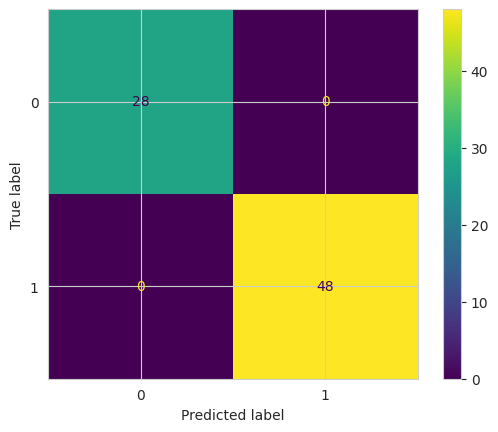

In [ ]:
model_SVC= SVC()
model_SVC.fit(X_train,y_train)
model_pred = model_SVC.predict(X_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_SVC.classes_)
disp.plot()
print(classification_report(y_test,model_pred))


In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold

acc = k_evaluate(10, model_SVC, X, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9723472065991751
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


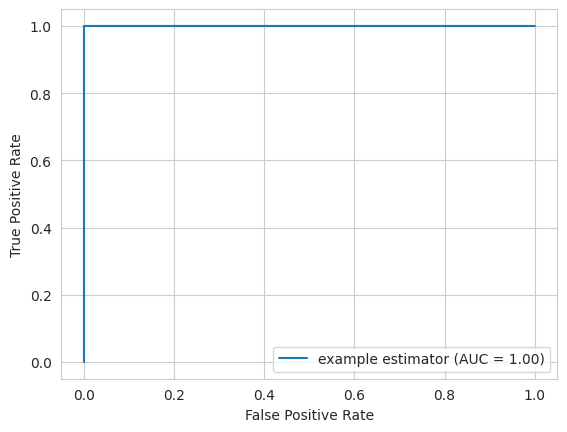

In [ ]:
# find fpr(False positive rate), tpr(True positive rate)
fpr, tpr, thresholds = roc_curve(y_test, model_pred)
# calculate Area under ROC curve. If None, the roc_auc score is not shown.
roc_auc = auc(fpr, tpr)

display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

## With Naive Bayes

[[27  1]
 [ 1 47]]


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        28
         1.0       0.98      0.98      0.98        48

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



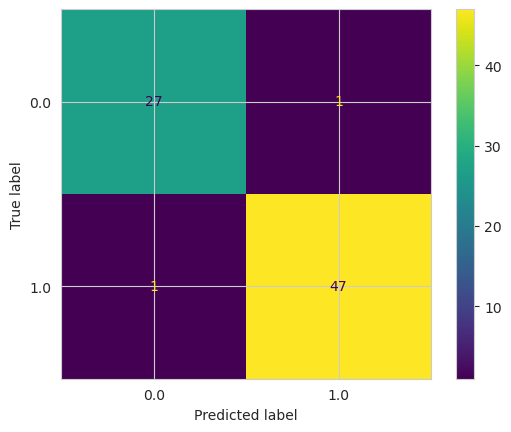

In [ ]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_test,y_pred))

In [ ]:

# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, X, y)


NameError: name 'evaluate_fn' is not defined

## Using Decision Tree

[[24  4]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        28
         1.0       0.92      1.00      0.96        48

    accuracy                           0.95        76
   macro avg       0.96      0.93      0.94        76
weighted avg       0.95      0.95      0.95        76



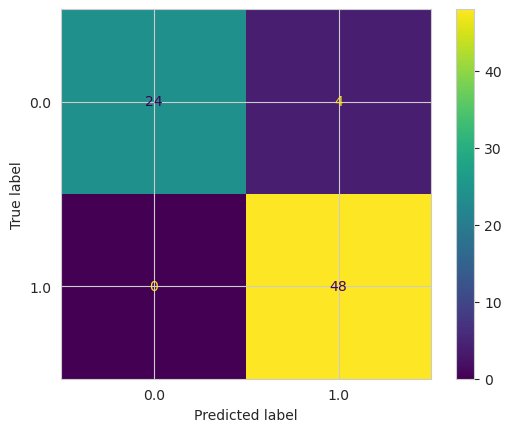

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,dt_pred)
print(cm)
print('\n')
print(classification_report(y_test,dt_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, dt, X, y)


precision :  0.8571428571428571 
 recall : 1.0 
 f1_score : 0.923076923076923


for fold: 2, accuracy is: 0.9525684289463816
for fold: 3, accuracy is: 0.9684407096171802
for fold: 4, accuracy is: 0.9525669642857144
for fold: 5, accuracy is: 0.9842352941176472
for fold: 6, accuracy is: 0.9645625692137321
for fold: 7, accuracy is: 0.9686829686829687
for fold: 8, accuracy is: 0.9763104838709677
for fold: 9, accuracy is: 0.960591133004926
for fold: 10, accuracy is: 0.9686153846153844
Best fit
5 gives accuracy of 0.9842352941176472


# Wrapper Feature Selection

## JAYA

### Implementation

In [ ]:
# Path to directory provided.
%cd "/content/drive/MyDrive/Adv Machine Learning/Wrapper_Feature_Selection_Methods"

/content/drive/MyDrive/Adv Machine Learning/Wrapper_Feature_Selection_Methods


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from FS.ja import jfs   # change this to switch algorithm

In [ ]:

# grab our features
# y = data['cancer']
y = y.values
# x = data.drop(['cancer','patient','dataset'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (202, 15154)
y_train shape:  (202,)
x_text:  (51, 15154)
y_test:  (51,)


In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01
fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
x = X.to_numpy()
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}


In [ ]:
print(type(x))
print(type(y))
# make sure the type should be 'numpy.ndarray' for both.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# perform feature selection
fmdl = jfs(x, y, opts)
sf   = fmdl['sf']

Generation: 1
Best (JA): 0.04374104293954613
Generation: 2
Best (JA): 0.043737083588879636
Generation: 3
Best (JA): 0.04370342910821447
Generation: 4
Best (JA): 0.04370342910821447
Generation: 5
Best (JA): 0.04370342910821447
Generation: 6
Best (JA): 0.0436697746275493
Generation: 7
Best (JA): 0.04366449549332731
Generation: 8
Best (JA): 0.04364733830710585
Generation: 9
Best (JA): 0.04364733830710585
Generation: 10
Best (JA): 0.0436453586317726
Generation: 11
Best (JA): 0.04363018112088439
Generation: 12
Best (JA): 0.04363018112088439
Generation: 13
Best (JA): 0.04362556187844015
Generation: 14
Best (JA): 0.04362556187844015
Generation: 15
Best (JA): 0.04361698328532942
Generation: 16
Best (JA): 0.04361698328532942
Generation: 17
Best (JA): 0.04361698328532942
Generation: 18
Best (JA): 0.04361698328532942
Generation: 19
Best (JA): 0.04361698328532942
Generation: 20
Best (JA): 0.04361236404288518
Generation: 21
Best (JA): 0.0436044453415522
Generation: 22
Best (JA): 0.0436044453415522


In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)  # Solve bug
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)  # Solve bug

In [ ]:
f = fmdl['sf']
len(f)

7063

<a name='cjaya'></a>
##### Correlation Matrix after JAYA feature selection

number of feature selected:  7063


<Axes: >

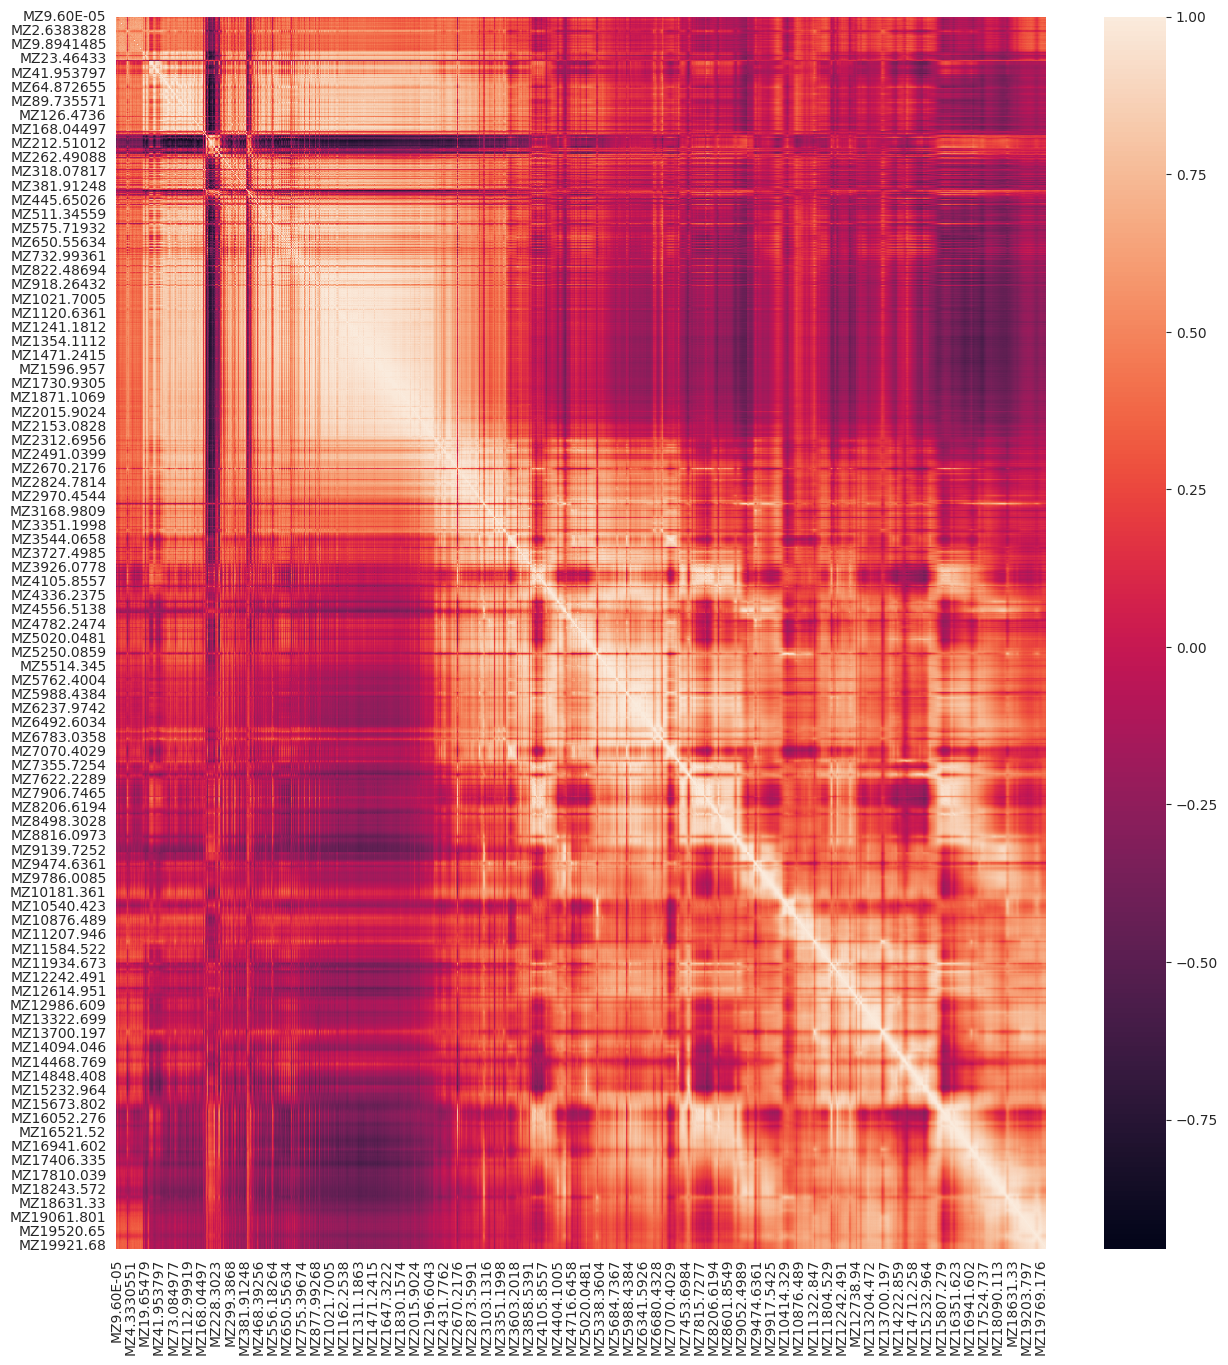

In [ ]:

# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))

print("number of feature selected: ", len(features))
cor = data[features].corr()
plt.figure(figsize=(15,16))
sns.heatmap(cor)

In [ ]:
# creating our new train set for KFold
new_data = data[features]

### Classification

##### SVM

In [ ]:
# Model
model = SVC()
model.fit(x_train,y_train)
model_pred = model.predict(x_valid)

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



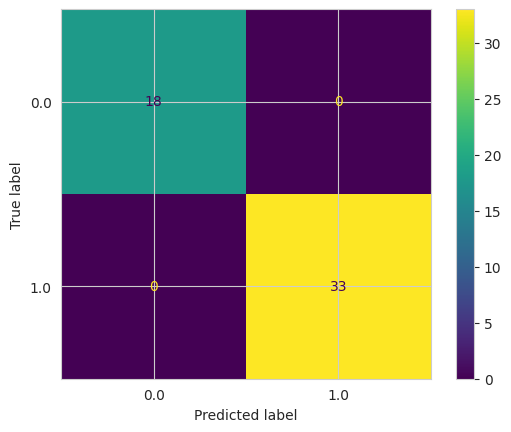

In [ ]:
cm = confusion_matrix(y_valid,model_pred)
print(cm)
print('\n')
print(classification_report(y_valid,model_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
# ROC curve
# plot_roc_curve(model, x_valid, y_valid)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

acc = k_evaluate(10,model, new_data, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9723784526934133
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9881552419354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
8 gives accuracy of 0.9881552419354839


##### LDA

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



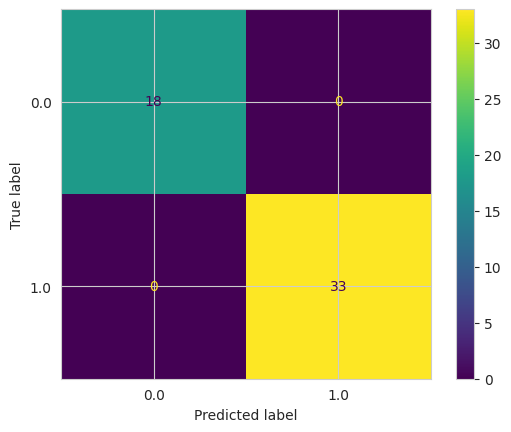

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_valid)

cm = confusion_matrix(y_valid,lda_pred)
print(cm)
print('\n')
print(classification_report(y_valid,lda_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
#Kfold
acc = k_evaluate(10,lda, new_data, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.996031746031746
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
3 gives accuracy of 1.0


##### Decision Tree

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



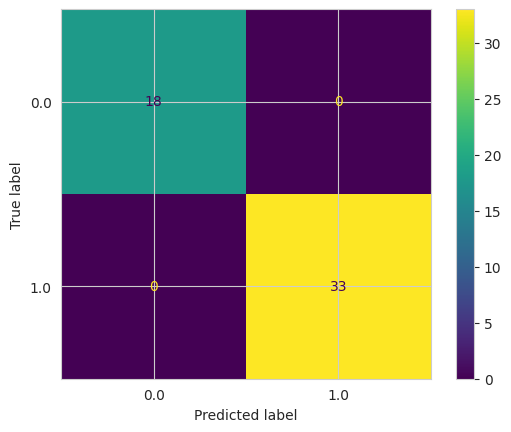

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_valid)

cm = confusion_matrix(y_valid,lda_pred)
print(cm)
print('\n')
print(classification_report(y_valid,dt_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,dt, new_data, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9408198975128109
for fold: 3, accuracy is: 0.9644724556489263
for fold: 4, accuracy is: 0.9802207341269842
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9802510151347361
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9644657258064516
for fold: 9, accuracy is: 0.968527640941434
for fold: 10, accuracy is: 0.9687692307692309
Best fit
7 gives accuracy of 0.9842342342342343


##### Naive Bayes

In [ ]:
gnb_sel = GaussianNB()

# X_train = sc.fit_transform(X_train[:, selected_features])
# X_test = sc.transform(X_test[:, selected_features])
gnb_sel.fit(x_train, y_train)
gnb_pred = gnb_sel.predict(x_valid)
print('Model accuracy:', gnb_sel.score(x_valid, y_valid))

cm = confusion_matrix(y_valid,gnb_pred)
print(cm)
print('\n')
print(classification_report(y_valid,gnb_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb_sel.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, gnb_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,gnb_sel, new_data, y)  # here k 10

##### Random Forest

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



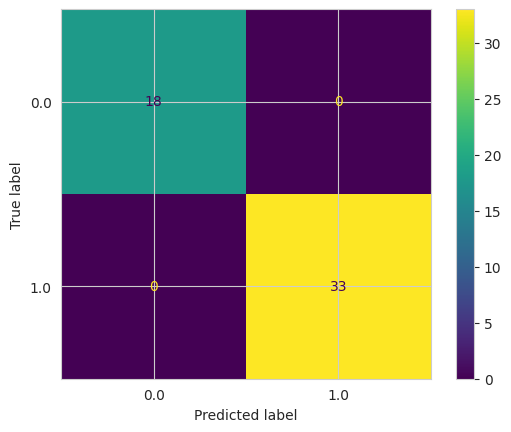

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_valid)

cm = confusion_matrix(y_valid,y_pred)
print(cm)
print('\n')
print(classification_report(y_valid,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_data, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9724096987876516
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9764384920634921
for fold: 5, accuracy is: 0.980313725490196
for fold: 6, accuracy is: 0.984311554078996
for fold: 7, accuracy is: 0.9843414843414845
for fold: 8, accuracy is: 0.984375
for fold: 9, accuracy is: 0.9764641488779419
for fold: 10, accuracy is: 0.9803076923076922
Best fit
8 gives accuracy of 0.984375


## GWO(Grey Wolf Optimization)

### Extracting Features

In [ ]:
from zoofs import GreyWolfOptimization

In [ ]:
# Set up objective function
from sklearn.metrics import log_loss
# make sure that objective fun shoud recieve 4 parameters
# Now fit your model to return objective vaule
def objective_function(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    P=log_loss(y_valid,model.predict_proba(X_valid))
    return P


In [ ]:
# create object of algorithm
# population_size=? change this number if you want more features depending open your computation power
algo_object=GreyWolfOptimization(objective_function,n_iteration=20,
                                    population_size=100,minimize=True)


In further code x_train type will may be differ but here it need x_train to be of type pandas.core.frame.DataFrame, so make sure x_train type be the same.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (202, 15154)
y_train shape:  (202,)
x_text:  (51, 15154)
y_test:  (51,)


In [ ]:
# Import and initialize classifier
# import lightgbm as lgb
lgb_model = LinearDiscriminantAnalysis()

# Fit the classifier
features = algo_object.fit(lgb_model,x_train, y_train, x_train, y_train,verbose=True)

 [ 2023-09-02 23:31:51,794 ] Finished iteration #0 with objective value 2.269911431535593e-16. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:32:13,264 ] Finished iteration #1 with objective value 2.22687654895022e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:32:34,528 ] Finished iteration #2 with objective value 3.524298564766663e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:32:56,195 ] Finished iteration #3 with objective value 2.2202811646471816e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:33:17,807 ] Finished iteration #4 with objective value 1.8073551456340452e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:33:39,184 ] Finished iteration #5 with objective value 1.3137455919628024e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:34:00,838 ] Finished iteration #6 with objective value 6.792916064675468e-14. Current best value is 2.269911431535593e-16 
 [ 2023-09-02 23:3

In [ ]:
len(features)

11377

### Data Preparation

In [ ]:
# Fetching our new dataset with selected features
new_data = data[features]
new_data.head()

MZ9.60E-05  MZ0.000366014  MZ0.001428564  MZ0.002221123  MZ0.003187869  \
0    0.321841       0.220934       0.316458       0.154763       0.223685   
1    0.321841       0.069771       0.354432       0.321431       0.144740   
2    0.321841       0.209307       0.113927       0.369049       0.223685   
3    0.310347       0.197673       0.455701       0.416666       0.210527   
4    0.367817       0.383719       0.392405       0.238094       0.500000   

   MZ0.004328805  MZ0.005643929  MZ0.008796743  MZ0.010634432  MZ0.012646311  \
0       0.304346       0.241757       0.253731       0.371796       0.270002   
1       0.260869       0.142853       0.328356       0.346156       0.270002   
2       0.536231       0.131865       0.044775       0.333335       0.330000   
3       0.420292       0.274723       0.313431       0.179488       0.249998   
4       0.362316       0.274723       0.462688       0.410256       0.450001   

   ...  MZ19969.128  MZ19971.766  MZ19977.042  MZ19979.68  MZ19982.319  \
0  ...     0.460134     0.467498     0.449296    0.449296     0.449296   
1  ...     0.644474     0.622356     0.619718    0.619718     0.619718   
2  ...     0.029993     0.032870     0.035918    0.035918     0.035918   
3  ...     0.487928     0.495252     0.486621    0.486621     0.486621   
4  ...     0.238478     0.245436     0.251408    0.251408     0.251408   

   MZ19984.957  MZ19987.596  MZ19990.235  MZ19992.874  MZ19995.513  
0     0.449296     0.449296     0.449296     0.449296     0.449296  
1     0.619718     0.619718     0.619718     0.619718     0.619718  
2     0.035918     0.035918     0.035918     0.035918     0.035918  
3     0.486621     0.486621     0.486621     0.486621     0.486621  
4     0.251408     0.251408     0.251408     0.251408     0.251408  

[5 rows x 11377 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (202, 11377)
y_train shape:  (202,)


In [ ]:
# Data scalling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Classification

#### SVC

In [ ]:
from sklearn.svm import SVC
model_SVC= SVC()
model_SVC.fit(x_train,y_train)
model_pred = model_SVC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')
print(classification_report(y_test,model_pred))

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



for fold: 2, accuracy is: 0.9684101987251593
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


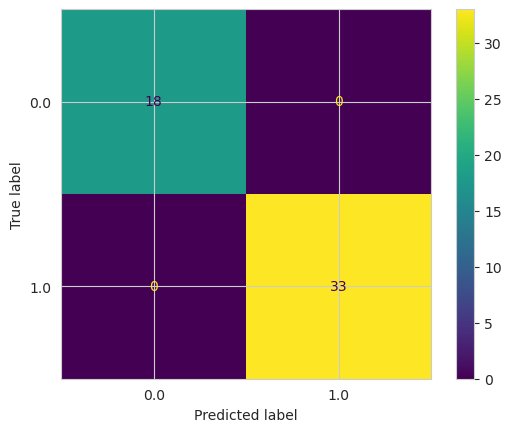

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_SVC.classes_)
disp.plot()

# k fold cross validation
acc = k_evaluate(10, model_SVC, new_data, y)

#### Naive Bayes

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51



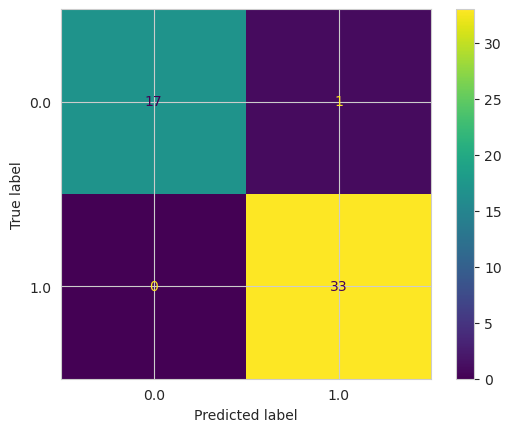

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_test,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, new_data, y)

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
for fold: 2, accuracy is: 0.8736407949006374
for fold: 3, accuracy is: 0.9011204481792716
for fold: 4, accuracy is: 0.8932291666666666
for fold: 5, accuracy is: 0.8933333333333333
for fold: 6, accuracy is: 0.8855666297526762
for fold: 7, accuracy is: 0.9015444015444016
for fold: 8, accuracy is: 0.8975554435483871
for fold: 9, accuracy is: 0.8977832512315271
for fold: 10, accuracy is: 0.8973846153846153
Best fit
7 gives accuracy of 0.9015444015444016


#### LDA

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



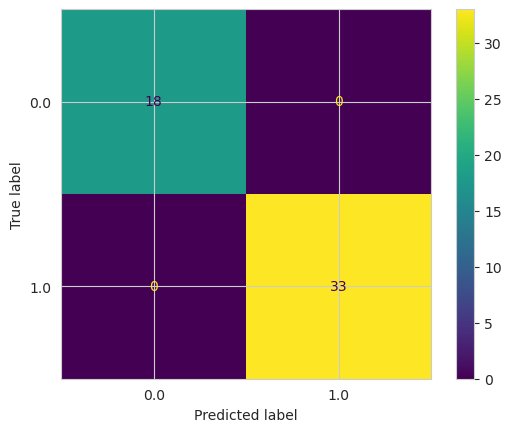

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)
cm  = confusion_matrix(y_test,lda_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
print('\n')
print(classification_report(y_test,lda_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
acc = k_evaluate(10, lda, new_data, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 1.0
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
2 gives accuracy of 1.0


#### Decision Tree

[[18  0]
 [ 1 32]]


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.97      0.98        33

    accuracy                           0.98        51
   macro avg       0.97      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



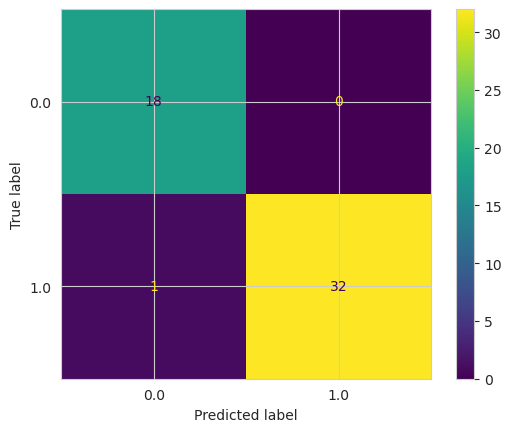

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,dt_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
print('\n')
print(classification_report(y_test,dt_pred))


In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")

acc = k_evaluate(10, dt, new_data, y)  # here k 10

precision :  1.0 
 recall : 0.9473684210526315 
 f1_score : 0.972972972972973


for fold: 2, accuracy is: 0.9723472065991751
for fold: 3, accuracy is: 0.9842203548085902
for fold: 4, accuracy is: 0.9763144841269842
for fold: 5, accuracy is: 0.9763137254901961
for fold: 6, accuracy is: 0.976375046142488
for fold: 7, accuracy is: 0.9764049764049764
for fold: 8, accuracy is: 0.9645917338709677
for fold: 9, accuracy is: 0.972495894909688
for fold: 10, accuracy is: 0.9686153846153847
Best fit
3 gives accuracy of 0.9842203548085902


#### Random Forest

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



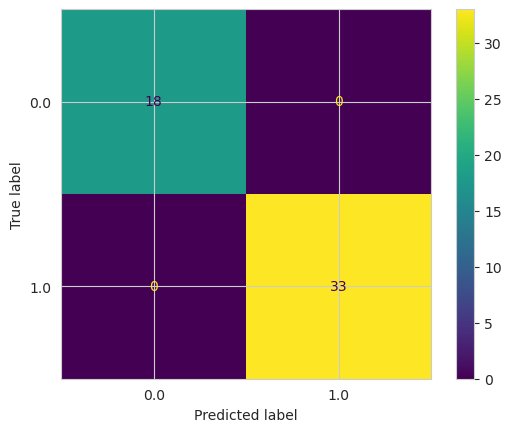

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_data, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.984251968503937
for fold: 3, accuracy is: 0.9881886087768441
for fold: 4, accuracy is: 0.9803447420634921
for fold: 5, accuracy is: 0.9921568627450981
for fold: 6, accuracy is: 0.988187523071244
for fold: 7, accuracy is: 0.9882024882024882
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9883076923076924
Best fit
5 gives accuracy of 0.9921568627450981


## GA(Genetic Algorithm)

### Implementation

In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X

def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break

    return index


def genetic_search(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate

    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR']
    if 'MR' in opts:
        MR   = opts['MR']

     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position
    X     = init_position(lb, ub, N, dim)

    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)

    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')

    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]

    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1

    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit)

        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
              Nc += 1

        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]

                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]


        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)

        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]

        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1

        # Elitism
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]].item()


    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return ga_data

In [ ]:

X = data.drop(['Class'], axis=1)
Y = y.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (202, 15154)
y_train shape:  (202,)
x_text:  (51, 15154)
y_test:  (51,)


In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01

fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}

opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

X = X.to_numpy()



In [ ]:
type(X)

numpy.ndarray

In [ ]:
# perform feature selection
fmdl = genetic_search(X, Y, opts)
sf   = fmdl['sf']

Generation: 1
Best (GA): 0.04371398737665844
Generation: 2
Best (GA): 0.04371398737665844
Generation: 3
Best (GA): 0.04371398737665844
Generation: 4
Best (GA): 0.04371398737665844
Generation: 5
Best (GA): 0.04370738845888096
Generation: 6
Best (GA): 0.04369221094799274
Generation: 7
Best (GA): 0.04369221094799274
Generation: 8
Best (GA): 0.04368627192199301
Generation: 9
Best (GA): 0.04367769332888228
Generation: 10
Best (GA): 0.04367769332888228
Generation: 11
Best (GA): 0.043658556467327574
Generation: 12
Best (GA): 0.043633480579773135
Generation: 13
Best (GA): 0.043633480579773135
Generation: 14
Best (GA): 0.043633480579773135
Generation: 15
Best (GA): 0.043633480579773135
Generation: 16
Best (GA): 0.04362292231132916
Generation: 17
Best (GA): 0.04362160252777366
Generation: 18
Best (GA): 0.04361764317710717
Generation: 19
Best (GA): 0.04361236404288518
Generation: 20
Best (GA): 0.04360048599088571
Generation: 21
Best (GA): 0.043587288155330736
Generation: 22
Best (GA): 0.043587288

### New Data Preparation

In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)

In [ ]:
f = fmdl['sf']   ## its 11
# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))
print(len(features))

6731


In [ ]:
new_x = data.drop(['Class'], axis=1)[features]
new_x.head()

MZ-7.86E-05  MZ2.18E-07  MZ9.60E-05  MZ0.002221123  MZ0.003187869  \
0     0.494626    0.263735    0.321841       0.154763       0.223685   
1     0.258063    0.406593    0.321841       0.321431       0.144740   
2     0.537636    0.032966    0.321841       0.369049       0.223685   
3     0.000000    0.395605    0.310347       0.416666       0.210527   
4     0.526884    0.395605    0.367817       0.238094       0.500000   

   MZ0.004328805  MZ0.007133241  MZ0.012646311  MZ0.017192634  MZ0.019727078  \
0       0.304346       0.277106       0.270002       0.373736       0.387100   
1       0.260869       0.518075       0.270002       0.414139       0.290324   
2       0.536231       0.469877       0.330000       0.373736       0.354838   
3       0.420292       0.542170       0.249998       0.595962       0.215058   
4       0.362316       0.289160       0.450001       0.535352       0.268819   

   ...  MZ19953.306  MZ19955.943  MZ19958.58  MZ19966.491  MZ19969.128  \
0  ...     0.473529     0.484873    0.481342     0.474182     0.460134   
1  ...     0.644669     0.627728    0.634964     0.643634     0.644474   
2  ...     0.062363     0.071076    0.055594     0.034907     0.029993   
3  ...     0.483687     0.492615    0.492320     0.471274     0.487928   
4  ...     0.228430     0.240675    0.252375     0.244360     0.238478   

   MZ19979.68  MZ19982.319  MZ19987.596  MZ19990.235  MZ19995.513  
0    0.449296     0.449296     0.449296     0.449296     0.449296  
1    0.619718     0.619718     0.619718     0.619718     0.619718  
2    0.035918     0.035918     0.035918     0.035918     0.035918  
3    0.486621     0.486621     0.486621     0.486621     0.486621  
4    0.251408     0.251408     0.251408     0.251408     0.251408  

[5 rows x 6731 columns]

### Classification

#### SVC

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



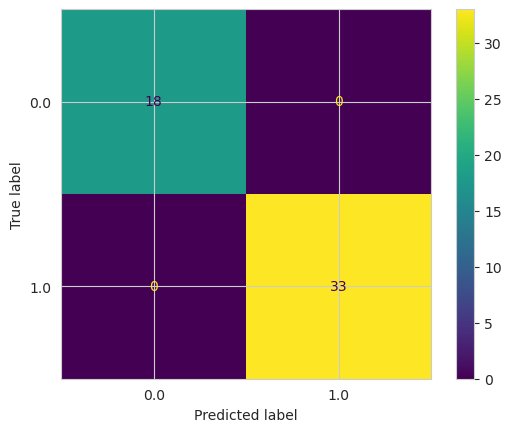

In [ ]:
model = SVC()
model.fit(x_train, y_train)
model_pred = model.predict(x_valid)
cm = confusion_matrix(y_valid,model_pred)
print(cm)
print('\n')
print(classification_report(y_test,model_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
print(classification_report(y_valid,model_pred))

In [ ]:
# K-FOLD cross validatoion
acc = k_evaluate(10, model, new_x, y)  # here k 10

for fold: 2, accuracy is: 0.9723472065991751
for fold: 3, accuracy is: 0.9841736694677872
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


#### Naive Bayes

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51



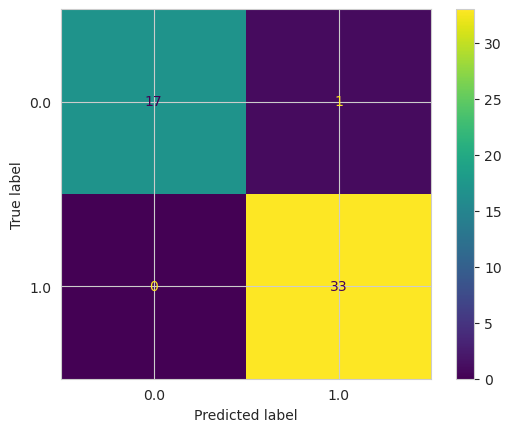

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_valid,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, new_x, y)

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
for fold: 2, accuracy is: 0.881514810648669
for fold: 3, accuracy is: 0.9011204481792716
for fold: 4, accuracy is: 0.8932291666666666
for fold: 5, accuracy is: 0.8972549019607843
for fold: 6, accuracy is: 0.8894425987449243
for fold: 7, accuracy is: 0.9093736593736594
for fold: 8, accuracy is: 0.9014616935483871
for fold: 9, accuracy is: 0.9135194307608102
for fold: 10, accuracy is: 0.912923076923077
Best fit
9 gives accuracy of 0.9135194307608102


#### LDA

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0




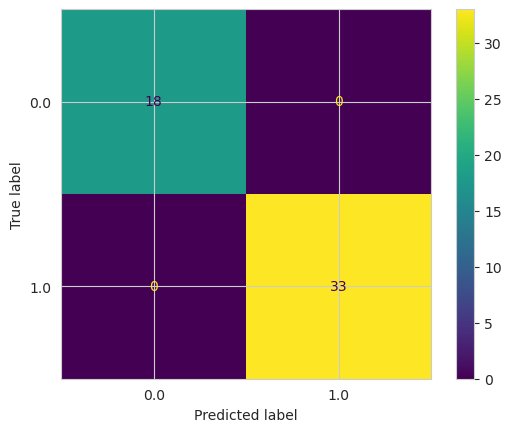

In [ ]:

lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_valid)
cm = confusion_matrix(y_valid,lda_pred)
print(cm)
print('\n')
print(classification_report(y_valid,lda_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
print(classification_report(y_valid,lda_pred))

# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print('\n')

In [ ]:
# K-FOLD Cross Validation
acc = k_evaluate(10, lda, new_x, y)  # here k 10

for fold: 2, accuracy is: 1.0
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
2 gives accuracy of 1.0


#### Decision Tree

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714




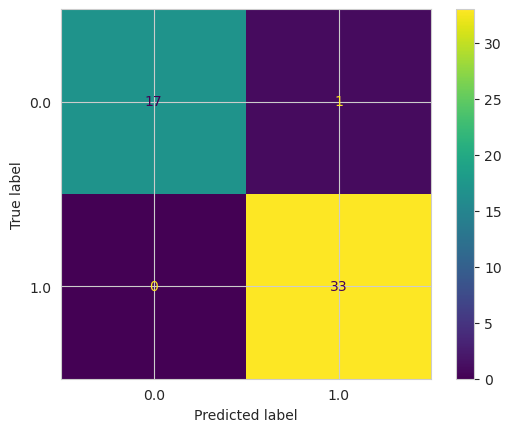

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_valid)

# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
cm = confusion_matrix(y_valid,dt_pred)
print(cm)
print('\n')
print(classification_report(y_valid,dt_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
print(classification_report(y_valid, dt_pred))

# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print('\n')

In [ ]:
acc = k_evaluate(10, dt, new_x, y)  # here k 10

for fold: 2, accuracy is: 0.9326959130108736
for fold: 3, accuracy is: 0.9723155929038282
for fold: 4, accuracy is: 0.9525049603174602
for fold: 5, accuracy is: 0.9605490196078431
for fold: 6, accuracy is: 0.9644702842377262
for fold: 7, accuracy is: 0.9684684684684685
for fold: 8, accuracy is: 0.9605594758064516
for fold: 9, accuracy is: 0.9604542966611932
for fold: 10, accuracy is: 0.9526153846153846
Best fit
3 gives accuracy of 0.9723155929038282


#### Random Forest

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



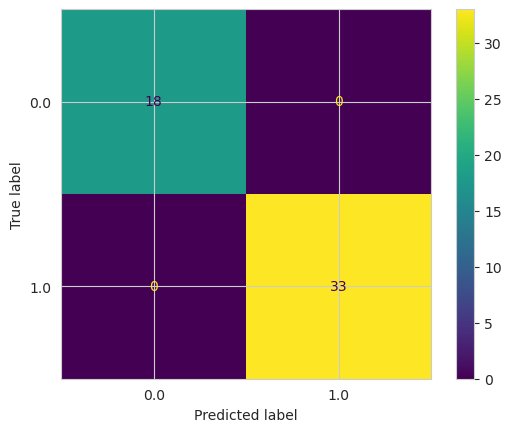

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_valid)

cm = confusion_matrix(y_valid,y_pred)
print(cm)
print('\n')
print(classification_report(y_valid,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_x, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.984251968503937
for fold: 3, accuracy is: 0.9842203548085902
for fold: 4, accuracy is: 0.992125496031746
for fold: 5, accuracy is: 0.9882352941176471
for fold: 6, accuracy is: 0.992155777039498
for fold: 7, accuracy is: 0.9883097383097385
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.988232074438971
for fold: 10, accuracy is: 0.9883076923076924
Best fit
6 gives accuracy of 0.992155777039498


## PSO(Particle Swarm Optimization)

In [ ]:
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [ ]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [ ]:
from sklearn.model_selection import train_test_split
# features
x = data.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
feature_names = x.columns
feature_names

x_train shape:  (202, 15154)
y_train shape:  (202,)


Index(['MZ-7.86E-05', 'MZ2.18E-07', 'MZ9.60E-05', 'MZ0.000366014',
       'MZ0.000810195', 'MZ0.001428564', 'MZ0.002221123', 'MZ0.003187869',
       'MZ0.004328805', 'MZ0.005643929',
       ...
       'MZ19971.766', 'MZ19974.404', 'MZ19977.042', 'MZ19979.68',
       'MZ19982.319', 'MZ19984.957', 'MZ19987.596', 'MZ19990.235',
       'MZ19992.874', 'MZ19995.513'],
      dtype='object', length=15154)

In [ ]:
problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=100, seed=101)
best_features, best_fitness = algorithm.run(task)

In [ ]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
# print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

Number of selected features: 7100


In [ ]:
new_x = x[feature_names[selected_features]]
new_x.head()

MZ-7.86E-05  MZ9.60E-05  MZ0.000366014  MZ0.000810195  MZ0.002221123  \
0     0.494626    0.321841       0.220934       0.297622       0.154763   
1     0.258063    0.321841       0.069771       0.333335       0.321431   
2     0.537636    0.321841       0.209307       0.404762       0.369049   
3     0.000000    0.310347       0.197673       0.404762       0.416666   
4     0.526884    0.367817       0.383719       0.488099       0.238094   

   MZ0.003187869  MZ0.005643929  MZ0.007133241  MZ0.008796743  MZ0.014832378  \
0       0.223685       0.241757       0.277106       0.253731       0.490385   
1       0.144740       0.142853       0.518075       0.328356       0.355769   
2       0.223685       0.131865       0.469877       0.044775       0.365384   
3       0.210527       0.274723       0.542170       0.313431       0.240387   
4       0.500000       0.274723       0.289160       0.462688       0.346153   

   ...  MZ19903.244  MZ19908.51  MZ19913.778  MZ19926.95  MZ19937.49  \
0  ...     0.413407    0.407488     0.426741    0.444838    0.448864   
1  ...     0.565644    0.603525     0.576813    0.594521    0.628552   
2  ...     0.069139    0.060935     0.078232    0.106116    0.106536   
3  ...     0.528632    0.536708     0.536273    0.525652    0.509233   
4  ...     0.253492    0.259178     0.246797    0.241040    0.231533   

   MZ19950.67  MZ19955.943  MZ19963.854  MZ19966.491  MZ19974.404  
0    0.477515     0.484873     0.488105     0.474182     0.483622  
1    0.624555     0.627728     0.627256     0.643634     0.631765  
2    0.074231     0.071076     0.056960     0.034907     0.038462  
3    0.488221     0.492615     0.475849     0.471274     0.497864  
4    0.224125     0.240675     0.258109     0.244360     0.267096  

[5 rows x 7100 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 101)

### Classification

#### SVC

Model accuracy: 1.0
[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



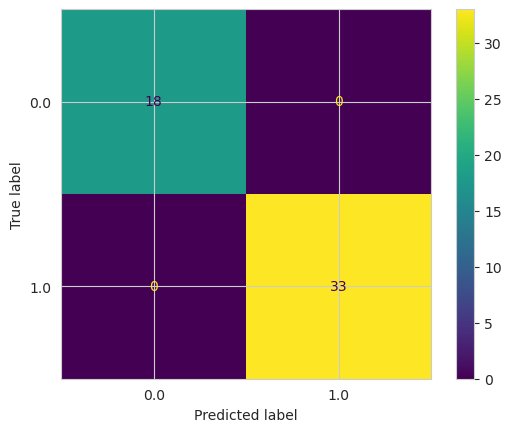

In [ ]:
model = SVC()
# X_train = sc.fit_transform(X_train[:, selected_features])
# X_test = sc.transform(X_test[:, selected_features])
model.fit(X_train, y_train)
print('Model accuracy:', model.score(X_test, y_test))

# plot confusion matrix
model_pred = model.predict(X_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')
print(classification_report(y_test,model_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
# Calculate all
model_pred = model.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
#K-fold
acc = k_evaluate(10,model, new_x, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9723472065991751
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9881552419354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
8 gives accuracy of 0.9881552419354839


#### Naive Bayes

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51



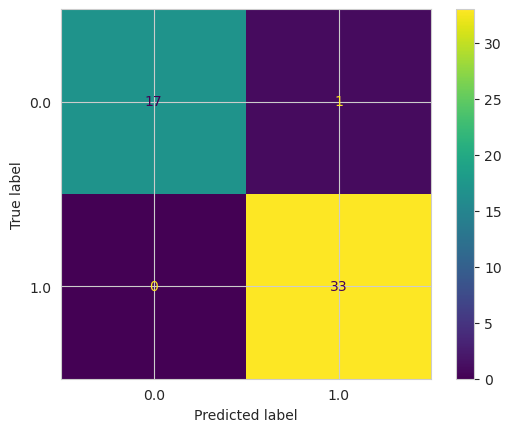

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_test,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, new_x, y)

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
for fold: 2, accuracy is: 0.8815460567429072
for fold: 3, accuracy is: 0.9050887021475256
for fold: 4, accuracy is: 0.9051339285714286
for fold: 5, accuracy is: 0.9011764705882352
for fold: 6, accuracy is: 0.8894425987449243
for fold: 7, accuracy is: 0.9054054054054055
for fold: 8, accuracy is: 0.8975554435483871
for fold: 9, accuracy is: 0.8976464148877942
for fold: 10, accuracy is: 0.9052307692307693
Best fit
7 gives accuracy of 0.9054054054054055


#### LDA

Subset accuracy: 1.0
[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



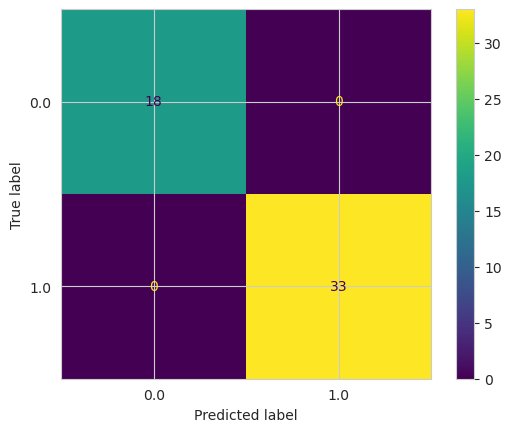

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)
print('Subset accuracy:', lda.score(X_test, y_test))

# plot confusion matrix
model_pred = lda.predict(X_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')
print(classification_report(y_test,model_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()

In [ ]:
# Calculate all
model_pred = lda.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")

#k-fold
acc = k_evaluate(10, lda, new_x, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 1.0
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
2 gives accuracy of 1.0


#### Decision Tree

Subset accuracy: 1.0
[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



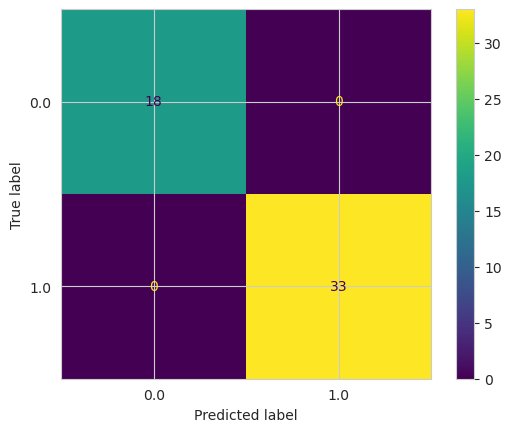

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

# X_train = sc.fit_transform(X_train[:, selected_features])
# X_test = sc.transform(X_test[:, selected_features])
dt.fit(X_train, y_train)
print('Subset accuracy:', dt.score(X_test, y_test))

# plot confusion matrix
model_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')
print(classification_report(y_test,model_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

In [ ]:
# Calculate all
model_pred = dt.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")

#k-fold
acc = k_evaluate(10,dt, new_x, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9525996750406199
for fold: 3, accuracy is: 0.9684407096171802
for fold: 4, accuracy is: 0.9683779761904762
for fold: 5, accuracy is: 0.968392156862745
for fold: 6, accuracy is: 0.9684385382059801
for fold: 7, accuracy is: 0.9684684684684685
for fold: 8, accuracy is: 0.9724042338709677
for fold: 9, accuracy is: 0.9645593869731801
for fold: 10, accuracy is: 0.9607692307692307
Best fit
8 gives accuracy of 0.9724042338709677


#### Random Forest

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



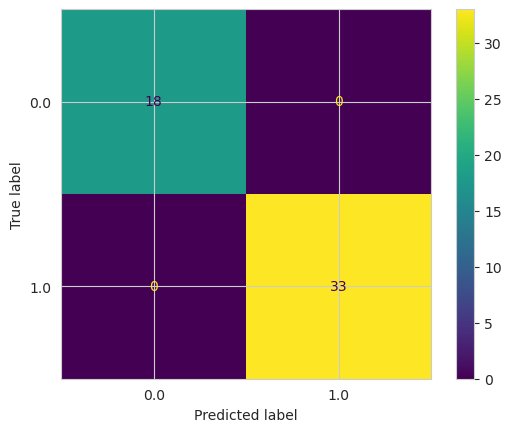

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_x, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9724096987876516
for fold: 3, accuracy is: 0.9881886087768441
for fold: 4, accuracy is: 0.988219246031746
for fold: 5, accuracy is: 0.9842352941176472
for fold: 6, accuracy is: 0.9882798080472499
for fold: 7, accuracy is: 0.9804804804804804
for fold: 8, accuracy is: 0.984375
for fold: 9, accuracy is: 0.98440065681445
for fold: 10, accuracy is: 0.9843076923076925
Best fit
6 gives accuracy of 0.9882798080472499


## Hybrid GWO with JAYA

### Implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from FS.GWOJA import jfs   # change this to switch algorithm

In [ ]:

# grab our features
Y = y.values
X = data.drop(['Class'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (202, 15154)
y_train shape:  (202,)
x_text:  (51, 15154)
y_test:  (51,)


In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01
fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
x = x.to_numpy()
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}


In [ ]:
# Check for types of x and y wheather they are numpy.ndarray or not
X = X.to_numpy()
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
fmdl = jfs(X, Y, opts)
sf   = fmdl['sf']

Iteration: 1
Best (GWO): 0.04373840337243513
Iteration: 2
Best (GWOJA): 0.02413856950989454
Iteration: 3
Best (GWOJA): 0.02413856950989454
Iteration: 4
Best (GWOJA): 0.02413856950989454
Iteration: 5
Best (GWOJA): 0.02413856950989454
Iteration: 6
Best (GWOJA): 0.02355456528658716
Iteration: 7
Best (GWOJA): 0.023343399917707657
Iteration: 8
Best (GWOJA): 0.023157310436382594
Iteration: 9
Best (GWOJA): 0.023055027210831584
Iteration: 10
Best (GWOJA): 0.02290853123617143
Iteration: 11
Best (GWOJA): 0.022866298162395528
Iteration: 12
Best (GWOJA): 0.022728380780846102
Iteration: 13
Best (GWOJA): 0.02258056502263045
Iteration: 14
Best (GWOJA): 0.022496098875078648
Iteration: 15
Best (GWOJA): 0.022403714026193865
Iteration: 16
Best (GWOJA): 0.02228889285686563
Iteration: 17
Best (GWOJA): 0.022152955150649453
Iteration: 18
Best (GWOJA): 0.022070468678430898
Iteration: 19
Best (GWOJA): 0.022023616362210757
Iteration: 20
Best (GWOJA): 0.021927272162659484
Iteration: 21
Best (GWOJA): 0.0218665621

### New Data Preparation

In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)  # Solve bug
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)  # Solve bug

In [ ]:
f = fmdl['sf']   ## its 11
# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))
print(len(features))

2150


### Classification

#### SVC

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



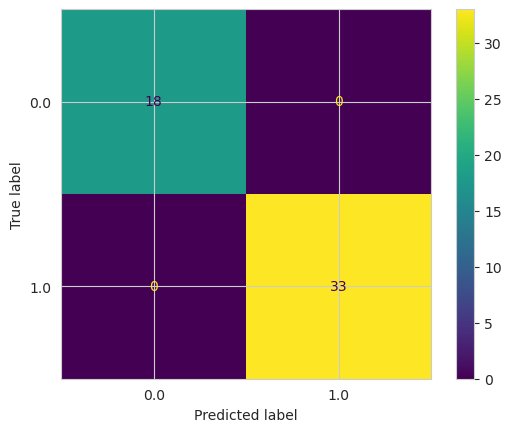

In [ ]:
# Model
model = SVC()
model.fit(x_train,y_train)
model_pred = model.predict(x_valid)
cm = confusion_matrix(y_valid,model_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

print('\n')
print(classification_report(y_valid,model_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,model, x[:, sf], y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9684101987251593
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


#### Naive Bayes

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51



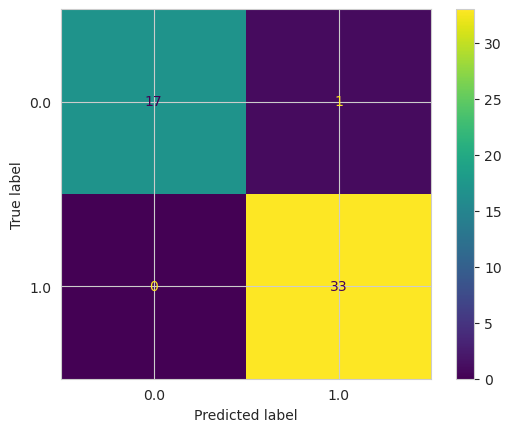

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_valid,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, x[:, sf], y)

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
for fold: 2, accuracy is: 0.8894200724909387
for fold: 3, accuracy is: 0.9049953314659197
for fold: 4, accuracy is: 0.9089781746031745
for fold: 5, accuracy is: 0.9169411764705883
for fold: 6, accuracy is: 0.8971945367294204
for fold: 7, accuracy is: 0.9131274131274132
for fold: 8, accuracy is: 0.9092741935483871
for fold: 9, accuracy is: 0.9092775041050903
for fold: 10, accuracy is: 0.9130769230769232
Best fit
5 gives accuracy of 0.9169411764705883


#### LDA

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



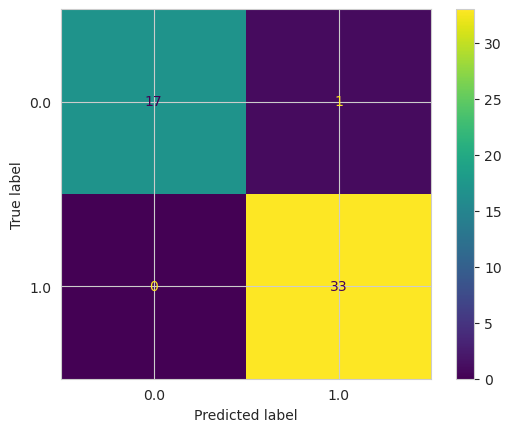

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_valid)
confusion_matrix(y_valid,lda_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
print('\n')
print(classification_report(y_valid,lda_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,lda, x[:, sf], y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9960629921259843
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 0.9961389961389961
for fold: 8, accuracy is: 0.99609375
for fold: 9, accuracy is: 0.9961685823754789
for fold: 10, accuracy is: 0.9961538461538462
Best fit
3 gives accuracy of 1.0


#### Decision Tree

[[17  1]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        18
         1.0       0.97      1.00      0.99        33

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51



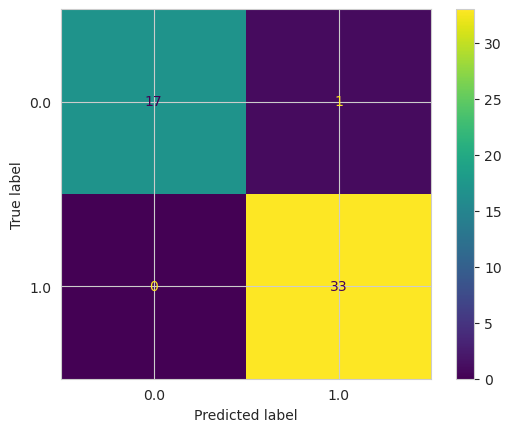

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_valid)
cm = confusion_matrix(y_valid,dt_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
print('\n')
print(classification_report(y_valid,dt_pred))


In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,dt, x[:, sf], y)  # here k 10

precision :  0.9444444444444444 
 recall : 1.0 
 f1_score : 0.9714285714285714
for fold: 2, accuracy is: 0.9130108736407949
for fold: 3, accuracy is: 0.9644724556489263
for fold: 4, accuracy is: 0.9642857142857142
for fold: 5, accuracy is: 0.9527058823529412
for fold: 6, accuracy is: 0.9682539682539683
for fold: 7, accuracy is: 0.9603174603174603
for fold: 8, accuracy is: 0.9686239919354839
for fold: 9, accuracy is: 0.9682539682539684
for fold: 10, accuracy is: 0.976
Best fit
10 gives accuracy of 0.976


#### Random Forest

[[18  0]
 [ 0 33]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



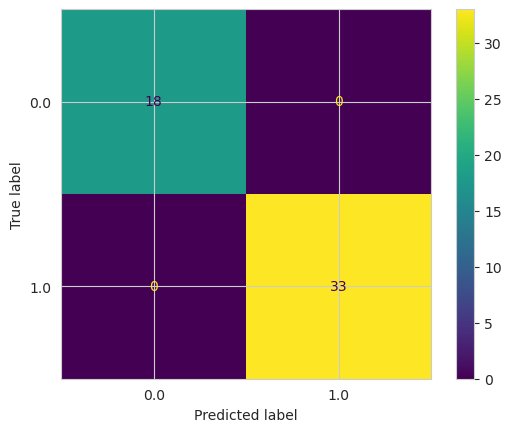

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_valid)


cm = confusion_matrix(y_valid,y_pred)
print(cm)
print('\n')
print(classification_report(y_valid,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, x[:, sf], y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9645669291338583
for fold: 3, accuracy is: 0.9842203548085902
for fold: 4, accuracy is: 0.9724702380952381
for fold: 5, accuracy is: 0.9843137254901961
for fold: 6, accuracy is: 0.9686231081579919
for fold: 7, accuracy is: 0.9765122265122266
for fold: 8, accuracy is: 0.9802167338709677
for fold: 9, accuracy is: 0.9804324028461959
for fold: 10, accuracy is: 0.9803076923076922
Best fit
5 gives accuracy of 0.9843137254901961


## Support Vector Machines (SVM) with Recursive Feature Elimination (RFE): SVM-RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel="linear")

In [ ]:
# Create the RFE object
num_features_to_select = 100  # Number of features to select
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)


# Fit RFE to the training data
# This will take time
rfe.fit(X_train, y_train)


RFE(estimator=SVC(kernel='linear'), n_features_to_select=100)

In [ ]:
# Get the selected feature indices
selected_feature_indices = rfe.support_

In [ ]:
# Grab our features
def get_features(selected_feature_indices):
    # convert indeses to dictionary
    feat_idxs = dict(enumerate((selected_feature_indices).flatten(), 0)) # selected_feature_indices - numpy array
    selected_feature = []
    for key, val in col_dict.items():  # col_dict - dict containing features as vales and indces as keys
        for k, v in feat_idxs.items():
            if key == k and v != False:
                selected_feature.append(col_dict.get(key))
    return selected_feature

In [ ]:
selected_feature = get_features(selected_feature_indices)

In [ ]:
# get train and test set
X_train_selected = X_train[selected_feature]
X_test_selected = X_test[selected_feature]

#Train the SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("########## Accuracy with K-FOLD #########")
acc = k_evaluate(10, svm_classifier, X[selected_feature], y)

Accuracy: 1.00
########## Accuracy with K-FOLD #########
for fold: 2, accuracy is: 1.0
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
2 gives accuracy of 1.0


[[24  0]
 [ 0 52]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



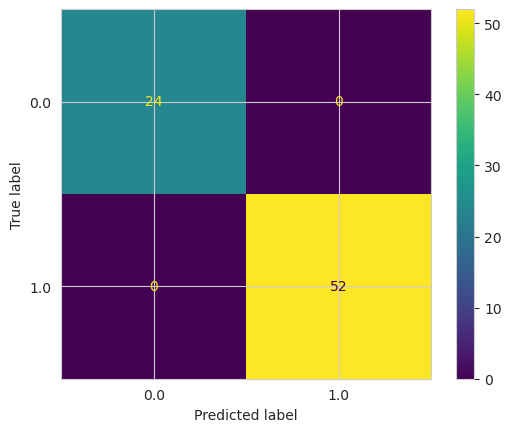

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_)
disp.plot()
print(classification_report(y_test,y_pred))


## Hybrid GWOPSO

#### Logic Implementation

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
# print("x_train shape: ", X_train.shape)
# print("y_train shape: ", y_train.shape)
# print("x_text: ",X_test.shape)
# print("y_test: ",y_test.shape)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(X_train)
# x_test = sc.transform(X_test)

In [ ]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost

def fjob(x):
    term1 = (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)
    term2 = (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2)
    o = (1 + term1) * (30 + term2)
    return o

def init_position(lb, ub, N, dim):
  X = np.zeros([N, dim], dtype='float')
  for i in range(N):
      for d in range(dim):
          X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * np.random.rand()

  return X

def Get_Functions_details(xtrain):
    lb = -2
    ub = 2
    dim = 2
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones((1, 2), dtype='float')
        lb = lb * np.ones((1, 2), dtype='float')

    return [lb,ub,dim]

def binary_conversion(X, thres, num_particles, dim):
  Xbin = np.zeros([num_particles, dim], dtype='int')
  for i in range(num_particles):
      for d in range(dim):
          if X[i,d] > thres:
              Xbin[i,d] = 1
          else:
              Xbin[i,d] = 0

  return Xbin

def boundary(x, lb, ub):
  if x < lb:
      x = lb
  if x > ub:
      x = ub
  return x

In [ ]:
def GWOPSO(num_particles,Max_iter, num_features, lb, ub, xtrain):
    dim = np.size(xtrain, 1)
    Alpha_pos = np.zeros((1, dim))
    Alpha_score= float('inf')
    Beta_pos= np.zeros((1,dim))
    Beta_score= float('inf')
    Delta_pos= np.zeros((1,dim))
    Delta_score= float('inf')
    fitGP = float('inf')  # fitness GWO-PSO
    lb = -2
    ub = 2
    thres = 0.5

    # Positions= init_position(lb, ub, num_particles, dim)
    # print("Positions shape: ",Positions.shape)
    Convergence_curve= np.zeros((1,Max_iter))
    # velocity = 0.3*np.random.randn(num_particles,dim)
    # print("Velocity shape: ",velocity.shape)
    # Initialize particle positions and velocities
    Positions = np.random.uniform(-1, 1, (num_particles, dim))
    Positions_P = np.random.uniform(-1, 1, (num_particles, dim))
    Positions_B =  binary_conversion(Positions, thres, num_particles, dim)
    print("Positions shape: ",Positions.shape)
    velocity = np.random.uniform(-0.1, 0.1, (num_particles, dim))
    print("Velocity shape: ",velocity.shape)
    w = 0.5 + np.random.rand()/2;
    # w = 0.5
    l = 0 # Loop counter
    fitP    = np.zeros([num_particles, 1], dtype='float') # Fitness PSO
    XgbP   = np.zeros([1, dim], dtype='float')

    print("fitP dimension", fitP.shape)
    print("Positions_B dimension", Positions_B.shape)
    print("XgbP dimension", XgbP.shape)
    print("Positions_p dimension", Positions_P.shape)


    #Xbin = binary_conversion(Positions, thres, N, dim)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
    for i in range(num_particles):
        fitP[i,0] = fjob(Positions_B[i,:])
        if fitP[i,0] < fitGP:
            XgbP[0,:] = Positions_P[i,:]
            fitGP     = fitP[i,0]


    while l < Max_iter:
        for i in range(Positions.shape[0]):
            # print("Enter lopp:", i)
            # Return back the search agents that go beyond the boundaries of the search space
            # Flag4ub=Positions[i,:]>2
            # Flag4lb=Positions[i,:]<-2
            # cond_ub = Flag4ub > 0
            # cond_lb = Flag4lb > 0

            # # Apply the operations using NumPy
            # Positions[i:,] = Positions[i,:] * np.logical_not(Flag4ub + Flag4lb) + ub * Flag4ub + lb * Flag4lb
            # Positions[i,:]=(Positions[i,:] * ((Flag4ub+Flag4lb)))+ub * Flag4ub+lb * Flag4lb

            # Calculate objective function for each search agent
            fitness=fjob(Positions[i,:])

            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score:
                Alpha_score=fitness # Update alpha
                Alpha_pos=Positions[i,:]


            if fitness>Alpha_score and fitness<Beta_score:
                Beta_score=fitness # Update beta
                Beta_pos=Positions[i,:]


            if fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score:
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:]



        a=2-l*((2)/Max_iter) # a decreases linearly fron 2 to 0

        # Update the Position of search agents including omegas
        for i in range(Positions.shape[0]):
            for j in range(Positions.shape[1]):

                r1 = np.random.rand(); # r1 is a random number in [0,1]
                r2 = np.random.rand()  # r2 is a random number in [0,1]

                A1 = 2*a*r1-a  # Equation (3.3)
                #C1=2*r2; # Equation (3.4)
                C1 = 0.5

                D_alpha = abs(C1*Alpha_pos[j] - w*Positions[i,j]); # Equation (3.5)-part 1
                X1 = Alpha_pos[j] - A1*D_alpha  # Equation (3.6)-part 1

                r1 = np.random.rand()
                r2 = np.random.rand()

                A2  =2*a*r1-a; # Equation (3.3)
                #C2=2*r2; # Equation (3.4)
                C2 = 0.5

                D_beta = abs(C2*Beta_pos[j] - w*Positions[i,j]) # Equation (3.5)-part 2
                X2 = Beta_pos[j] - A2*D_beta # Equation (3.6)-part 2

                r1=np.random.rand()
                r2=np.random.rand()
                r3=np.random.rand()
                A3=2*a*r1-a  # Equation (3.3)
                #C3=2*r2; # Equation (3.4)
                C3 = 0.5
                D_delta = abs(C3*Delta_pos[j] - w*Positions[i,j])  # Equation (3.5)-part 3
                X3 = Delta_pos[j] - A3*D_delta  # Equation (3.5)-part 3

                #velocity[i,j] = w * (velocity[i,j] + C1*r1*(X1-Positions[i,j]) + C2*r2*(X2-Positions[i,j]) + C3*r3*(X3-Positions[i,j]))
                velocity[i, j] = w * (velocity[i, j] + C1 * r1 * (X1 - Positions[i, j]) + C2 * r2 * (X2 - Positions[i, j]) + C3 * r3 * (X3 - Positions[i, j]))

                # positions update
                Positions[i,j]=Positions[i,j]+velocity[i,j]
                # Boundary
                Positions[i,j] = boundary(Positions[i,j], lb[0,j], ub[0,j])

        # Binary conversion
        #Xjbin = binary_conversion(Positions, thres, num_particles, dim)
        # Binary conversion
        Xjbin = binary_conversion(Positions, thres, num_particles, dim)
        # Greedy selection
        for i in range(num_particles):
            print("Greedy sel loop:", i)
            Fnew = fjob(Xjbin[i,:])
            if Fnew < fitP[i,0]:
                Positions_P[i,:]   = Positions[i,:]
                fitP[i,0] = Fnew

            if fitP[i,0] < fitGP:
                XgbP[0,:] = Positions_p[i,:]
                fitGP     = fitP[i,0]

        print("max_iter:", l) # progress
        l = l+1
        # Convergence_curve[l]=Alpha_score;


    return [Alpha_score,Alpha_pos,XgbP]

In [ ]:
num_particles = 30
Max_iter =100
num_features = 100
dim = np.size(X, 1)

lb = -2
ub = 2
# dim = 2
[lb,ub,dim]=Get_Functions_details(X_train)

# parameter
# k    = 5     # k-value in KNN
# N    = 10    # number of chromosomes
# T    = 100   # maximum number of generations
# CR   = 0.8
# MR   = 0.01
# fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
# x = X.to_numpy()
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

In [ ]:
[Best_score,Best_pos,XgbP] = GWOPSO(num_particles, Max_iter,num_features, lb, ub, X)

Positions shape:  (30, 15154)
Velocity shape:  (30, 15154)
fitP dimension (30, 1)
Positions_B dimension (30, 15154)
XgbP dimension (1, 15154)
Positions_p dimension (30, 15154)
Greedy sel loop: 0
Greedy sel loop: 1
Greedy sel loop: 2
Greedy sel loop: 3
Greedy sel loop: 4
Greedy sel loop: 5
Greedy sel loop: 6
Greedy sel loop: 7
Greedy sel loop: 8
Greedy sel loop: 9
Greedy sel loop: 10
Greedy sel loop: 11
Greedy sel loop: 12
Greedy sel loop: 13
Greedy sel loop: 14
Greedy sel loop: 15
Greedy sel loop: 16
Greedy sel loop: 17
Greedy sel loop: 18
Greedy sel loop: 19
Greedy sel loop: 20
Greedy sel loop: 21
Greedy sel loop: 22
Greedy sel loop: 23
Greedy sel loop: 24
Greedy sel loop: 25
Greedy sel loop: 26
Greedy sel loop: 27
Greedy sel loop: 28
Greedy sel loop: 29
max_iter: 0
Greedy sel loop: 0
Greedy sel loop: 1
Greedy sel loop: 2
Greedy sel loop: 3
Greedy sel loop: 4
Greedy sel loop: 5
Greedy sel loop: 6
Greedy sel loop: 7
Greedy sel loop: 8
Greedy sel loop: 9
Greedy sel loop: 10
Greedy sel l

In [ ]:
XgbP.shape

(1, 15154)

In [ ]:
def binary_conversion2(X, thres, num_particles, dim):
    Xbin = np.zeros([num_particles, dim], dtype='int')
    print("Xbin shape", Xbin.shape)
    # if len(X.shape) == 1:  # If X has a single row, convert it to a 2D array
    #     X = X.reshape(1, -1)
    for i in range(num_particles):
      for d in range(dim):
          if X[i,d] > thres:
              Xbin[i,d] = 1
          else:
              Xbin[i,d] = 0

    return Xbin

In [ ]:
#Best feature subset
Gbin       = binary_conversion(XgbP, 0.5, 1, dim)
Gbin       = Gbin.reshape(dim)
pos        = np.asarray(range(0, dim))
sel_index  = pos[Gbin == 1]
num_feat   = len(sel_index)
# Create dictionary
gwo_data = {'sf': sel_index, 'nf': num_feat}

In [ ]:
f = sel_index
# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))

#### Correlation matrix

<Axes: >

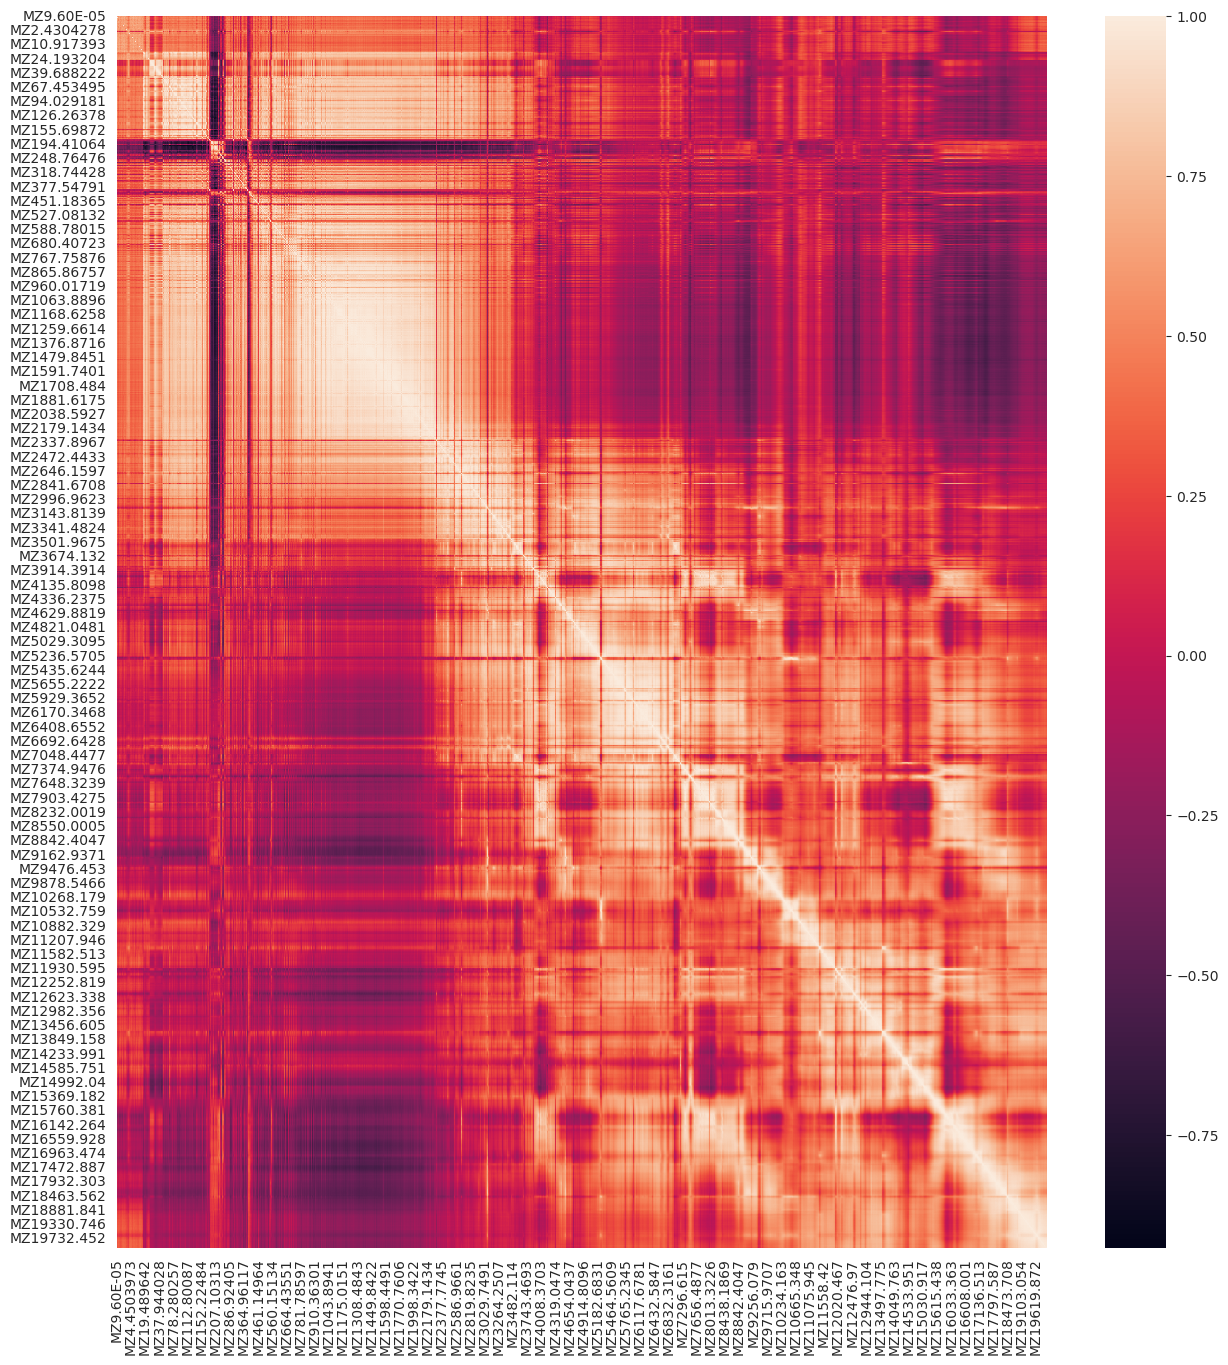

In [ ]:
cor = data[features].corr()
plt.figure(figsize=(15,16))
sns.heatmap(cor)

#### Building and spliting new data

In [ ]:
len(features)

3779

In [ ]:
new_x = X[features]
new_x.head()

MZ0.000366014  MZ0.001428564  MZ0.003187869  MZ0.004328805  MZ0.010634432  \
0       0.220934       0.316458       0.223685       0.304346       0.371796   
1       0.069771       0.354432       0.144740       0.260869       0.346156   
2       0.209307       0.113927       0.223685       0.536231       0.333335   
3       0.197673       0.455701       0.210527       0.420292       0.179488   
4       0.383719       0.392405       0.500000       0.362316       0.410256   

   MZ0.019727078  MZ0.042345469  MZ0.046273422  MZ0.050375564  MZ0.059102413  \
0       0.387100       0.521008       0.268814       0.475614       0.221051   
1       0.290324       0.411763       0.268814       0.329270       0.221051   
2       0.354838       0.529411       0.161290       0.402439       0.431576   
3       0.215058       0.319330       0.462367       0.414634       0.378946   
4       0.268819       0.394957       0.451609       0.658535       0.273681   

   ...  MZ19858.504  MZ19866.396  MZ19871.658  MZ19890.08  MZ19926.95  \
0  ...     0.392458     0.406964     0.416901    0.420830    0.444838   
1  ...     0.588687     0.595171     0.613381    0.591132    0.594521   
2  ...     0.020954     0.014208     0.019718    0.047146    0.106116   
3  ...     0.428074     0.456680     0.478871    0.497533    0.525652   
4  ...     0.238830     0.234374     0.225353    0.228004    0.241040   

   MZ19929.584  MZ19942.761  MZ19948.033  MZ19979.68  MZ19982.319  
0     0.441760     0.472321     0.467040    0.449296     0.449296  
1     0.595173     0.657803     0.629029    0.619718     0.619718  
2     0.098722     0.081237     0.088359    0.035918     0.035918  
3     0.524146     0.501796     0.483872    0.486621     0.486621  
4     0.246451     0.218546     0.217392    0.251408     0.251408  

[5 rows x 3779 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.3, random_state = 101)
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",X_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

x_train shape:  (177, 3779)
y_train shape:  (177,)
x_text:  (76, 3779)
y_test:  (76,)


### Classification

#### SVC

[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



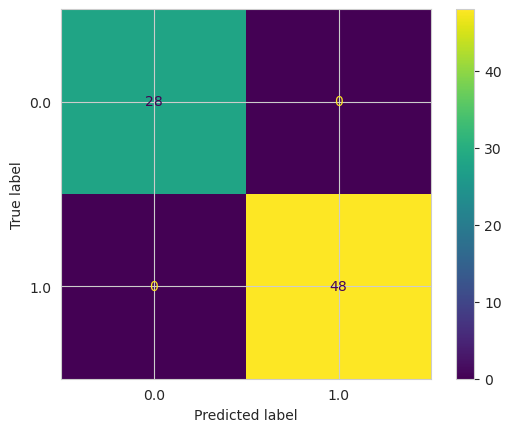

In [ ]:
model_SVC= SVC()
model_SVC.fit(x_train,y_train)
model_pred = model_SVC.predict(x_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_SVC.classes_)
disp.plot()
print(classification_report(y_test,model_pred))


In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, model_SVC, new_x, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9644731908511436
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.980343300110742
for fold: 7, accuracy is: 0.9803732303732303
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


#### LDA

[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



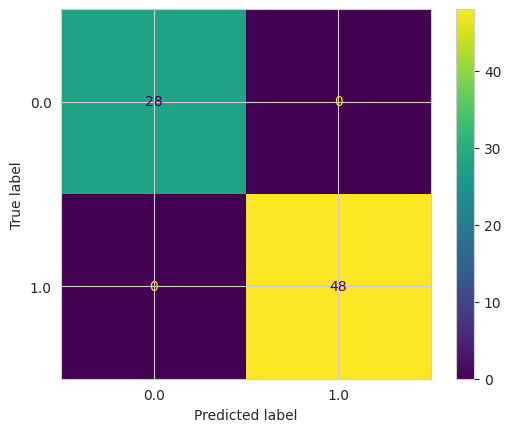

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)
cm = confusion_matrix(y_test,lda_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
print('\n')
print(classification_report(y_test,lda_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,lda, new_x, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 1.0
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
2 gives accuracy of 1.0


#### With Naive Bayes

[[27  1]
 [ 1 47]]


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        28
         1.0       0.98      0.98      0.98        48

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



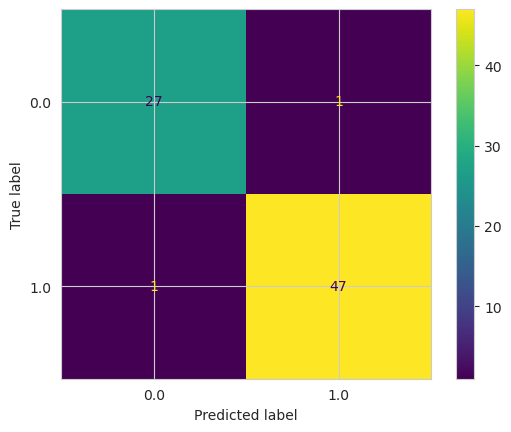

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_test,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, new_x, y)

precision :  0.9642857142857143 
 recall : 0.9642857142857143 
 f1_score : 0.9642857142857143
for fold: 2, accuracy is: 0.8815460567429072
for fold: 3, accuracy is: 0.9010737628384687
for fold: 4, accuracy is: 0.9011036706349206
for fold: 5, accuracy is: 0.9051764705882354
for fold: 6, accuracy is: 0.8973791066814324
for fold: 7, accuracy is: 0.9093736593736594
for fold: 8, accuracy is: 0.8975554435483871
for fold: 9, accuracy is: 0.9016146688560482
for fold: 10, accuracy is: 0.9130769230769232
Best fit
10 gives accuracy of 0.9130769230769232


#### Using Decision Tree

[[26  2]
 [ 3 45]]


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        28
         1.0       0.96      0.94      0.95        48

    accuracy                           0.93        76
   macro avg       0.93      0.93      0.93        76
weighted avg       0.94      0.93      0.93        76



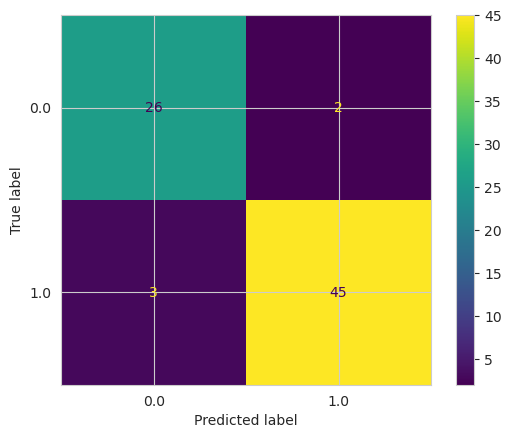

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,dt_pred)
print(cm)
print('\n')
print(classification_report(y_test,dt_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, dt, new_x, y)


precision :  0.9285714285714286 
 recall : 0.896551724137931 
 f1_score : 0.912280701754386


for fold: 2, accuracy is: 0.9524746906636671
for fold: 3, accuracy is: 0.9250233426704014
for fold: 4, accuracy is: 0.9331597222222223
for fold: 5, accuracy is: 0.9604705882352942
for fold: 6, accuracy is: 0.9604097452934662
for fold: 7, accuracy is: 0.9564564564564565
for fold: 8, accuracy is: 0.9566532258064516
for fold: 9, accuracy is: 0.9603174603174602
for fold: 10, accuracy is: 0.9564615384615383
Best fit
5 gives accuracy of 0.9604705882352942


#### Random Forest

Accuracy: 1.0
[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



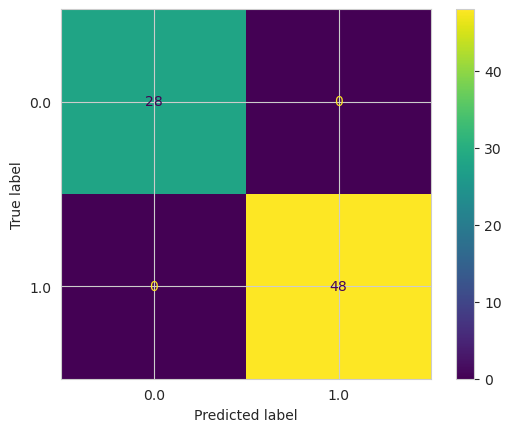

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_x, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0


for fold: 2, accuracy is: 0.9685039370078741
for fold: 3, accuracy is: 0.9763305322128852
for fold: 4, accuracy is: 0.9842509920634921
for fold: 5, accuracy is: 0.9842352941176472
for fold: 6, accuracy is: 0.992155777039498
for fold: 7, accuracy is: 0.9765122265122266
for fold: 8, accuracy is: 0.98046875
for fold: 9, accuracy is: 0.9726327312534209
for fold: 10, accuracy is: 0.9764615384615386
Best fit
6 gives accuracy of 0.992155777039498


## Differential Evolution (DE)

DE is an optimization technique that involves creating new candidate solutions by combining information from existing solutions. In the context of feature selection, DE can be used to generate new feature subsets by combining features from different subsets.

### Implementation

In [ ]:
# please ensure that both X and y have same number of samples i.e 253 if notrerun the "Data Reading & Visualization part"
print(X.shape)
print(y.shape)

(253, 15154)
(253,)


In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X

def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin

def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub

    return x

In [ ]:
def differentialEvolution(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    CR    = 0.9     # crossover rate
    F     = 0.5     # factor

    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR']
    if 'F' in opts:
        F    = opts['F']

    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position
    X     = init_position(lb, ub, N, dim)

    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)

    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')

    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]

    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (DE):", curve[0,t])
    t += 1

    while t < max_iter:
        V = np.zeros([N, dim], dtype='float')
        U = np.zeros([N, dim], dtype='float')

        for i in range(N):
            # Choose r1, r2, r3 randomly, but not equal to i
            RN = np.random.permutation(N)
            for j in range(N):
                if RN[j] == i:
                    RN = np.delete(RN, j)
                    break

            r1 = RN[0]
            r2 = RN[1]
            r3 = RN[2]
            # mutation (2)
            for d in range(dim):
                V[i,d] = X[r1,d] + F * (X[r2,d] - X[r3,d])
                # Boundary
                V[i,d] = boundary(V[i,d], lb[0,d], ub[0,d])

            # Random one dimension from 1 to dim
            index = np.random.randint(low = 0, high = dim)
            # crossover (3-4)
            for d in range(dim):
                if (rand() <= CR)  or  (d == index):
                    U[i,d] = V[i,d]
                else:
                    U[i,d] = X[i,d]

        # Binary conversion
        Ubin = binary_conversion(U, thres, N, dim)

        # Selection
        for i in range(N):
            fitU = Fun(xtrain, ytrain, Ubin[i,:], opts)
            if fitU <= fit[i,0]:
                X[i,:]   = U[i,:]
                fit[i,0] = fitU

            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]


        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (DE):", curve[0,t])
        t += 1


    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim)
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    de_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return de_data


In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.3, random_state = 101)
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",X_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# parameter
k    = 5     # k-value in KNN
N    = 10   # number of chromosomes
T    = 100   # maximum number of iterations
CR   = 0.9  # crossover rate
F = 0.5 # constant factor
fold = {'xt':X_train, 'yt':y_train, 'xv':X_test, 'yv':y_test}
x = X.to_numpy()
Y = y.values
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'F':F}

x_train shape:  (177, 15154)
y_train shape:  (177,)
x_text:  (76, 15154)
y_test:  (76,)


In [ ]:
print(type(x))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
result = differentialEvolution(x, Y, opts)
sel_feat   = result['sf']

Generation: 1
Best (DE): 0.07006690955314906
Generation: 2
Best (DE): 0.07006097052714932
Generation: 3
Best (DE): 0.07004315344915012
Generation: 4
Best (DE): 0.07004315344915012
Generation: 5
Best (DE): 0.07002335669581766
Generation: 6
Best (DE): 0.057053791599230415
Generation: 7
Best (DE): 0.057053791599230415
Generation: 8
Best (DE): 0.056984502962566824
Generation: 9
Best (DE): 0.056984502962566824
Generation: 10
Best (DE): 0.056984502962566824
Generation: 11
Best (DE): 0.056984502962566824
Generation: 12
Best (DE): 0.056984502962566824
Generation: 13
Best (DE): 0.056984502962566824
Generation: 14
Best (DE): 0.056984502962566824
Generation: 15
Best (DE): 0.05698054361190033
Generation: 16
Best (DE): 0.05689343789723754
Generation: 17
Best (DE): 0.05689343789723754
Generation: 18
Best (DE): 0.05689343789723754
Generation: 19
Best (DE): 0.05689343789723754
Generation: 20
Best (DE): 0.05689343789723754
Generation: 21
Best (DE): 0.05689343789723754
Generation: 22
Best (DE): 0.056893

In [ ]:
f = result['sf']
# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))
print("Number of features found: ", len(features))

Number of features found:  7167


In [ ]:
new_x = X[features]
X_train, X_test, y_train, y_test = train_test_split(new_x, y.values, test_size = 0.3, random_state = 101)
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",X_test.shape)
print("y_test: ",y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

x_train shape:  (177, 7167)
y_train shape:  (177,)
x_text:  (76, 7167)
y_test:  (76,)


### Classification

#### SVC

[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



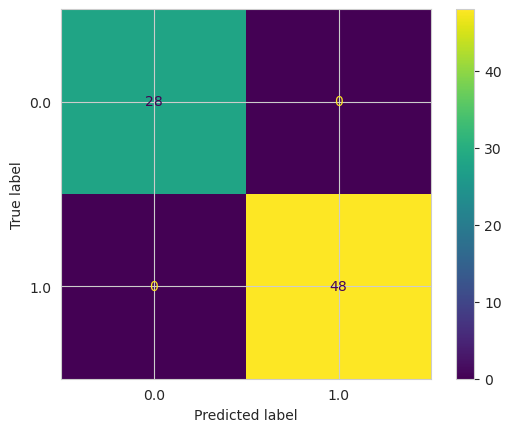

In [ ]:
model_SVC= SVC()
model_SVC.fit(X_train,y_train)
model_pred = model_SVC.predict(X_test)
cm = confusion_matrix(y_test,model_pred)
print(cm)
print('\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_SVC.classes_)
disp.plot()
print(classification_report(y_test,model_pred))


In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, model_SVC, new_x, y)

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9684101987251593
for fold: 3, accuracy is: 0.9802521008403362
for fold: 4, accuracy is: 0.9802827380952381
for fold: 5, accuracy is: 0.9802352941176471
for fold: 6, accuracy is: 0.9842192691029901
for fold: 7, accuracy is: 0.9842342342342343
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9803076923076922
Best fit
9 gives accuracy of 0.984263820470717


#### LDA

[[28  0]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



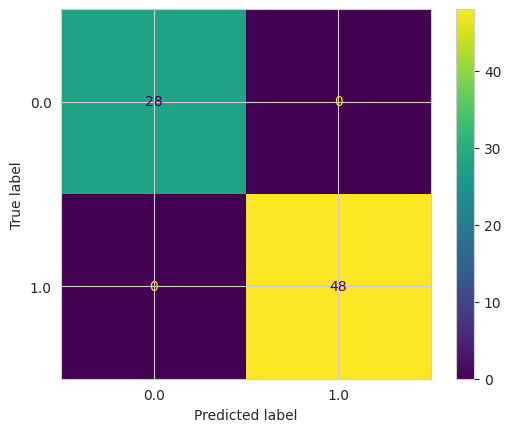

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda_pred = lda.predict(X_test)
confusion_matrix(y_test,lda_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
print('\n')
print(classification_report(y_test,lda_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

#Kfold
acc = k_evaluate(10,lda, new_x, y)  # here k 10

precision :  1.0 
 recall : 1.0 
 f1_score : 1.0
for fold: 2, accuracy is: 0.9920947381577303
for fold: 3, accuracy is: 1.0
for fold: 4, accuracy is: 1.0
for fold: 5, accuracy is: 1.0
for fold: 6, accuracy is: 1.0
for fold: 7, accuracy is: 1.0
for fold: 8, accuracy is: 1.0
for fold: 9, accuracy is: 1.0
for fold: 10, accuracy is: 1.0
Best fit
3 gives accuracy of 1.0


#### Naive Bayes

[[27  1]
 [ 2 46]]


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.98      0.96      0.97        48

    accuracy                           0.96        76
   macro avg       0.95      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76



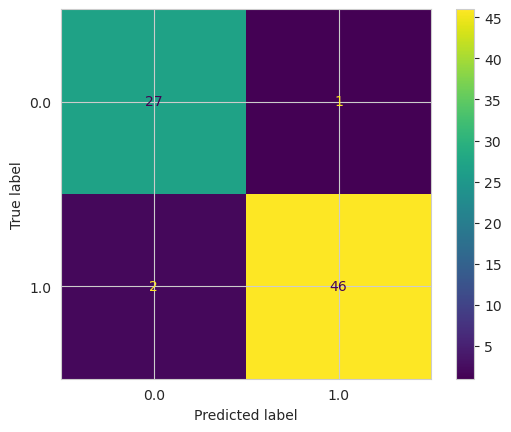

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
print(classification_report(y_test,y_pred))

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

# K-Fold
acc = k_evaluate(10, gnb, new_x, y)

precision :  0.9642857142857143 
 recall : 0.9310344827586207 
 f1_score : 0.9473684210526316
for fold: 2, accuracy is: 0.881514810648669
for fold: 3, accuracy is: 0.9011204481792716
for fold: 4, accuracy is: 0.9091021825396826
for fold: 5, accuracy is: 0.9011764705882352
for fold: 6, accuracy is: 0.8934108527131782
for fold: 7, accuracy is: 0.9015444015444016
for fold: 8, accuracy is: 0.8975554435483871
for fold: 9, accuracy is: 0.8977832512315271
for fold: 10, accuracy is: 0.9012307692307694
Best fit
4 gives accuracy of 0.9091021825396826


#### Decision Tree

[[27  1]
 [ 1 47]]


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        28
         1.0       0.98      0.98      0.98        48

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



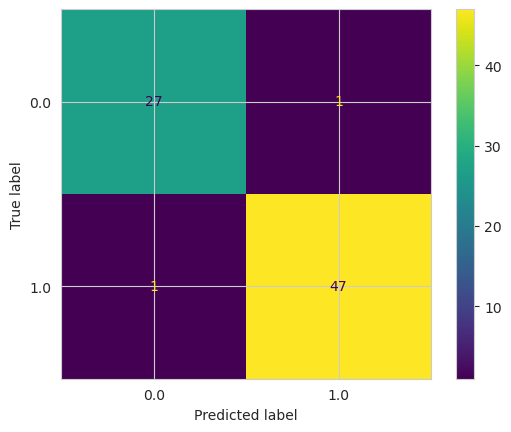

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,dt_pred)
print(cm)
print('\n')
print(classification_report(y_test,dt_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, dt, new_x, y)

precision :  0.9642857142857143 
 recall : 0.9642857142857143 
 f1_score : 0.9642857142857143


for fold: 2, accuracy is: 0.9526309211348581
for fold: 3, accuracy is: 0.9526143790849672
for fold: 4, accuracy is: 0.9605034722222223
for fold: 5, accuracy is: 0.9406274509803921
for fold: 6, accuracy is: 0.9526578073089702
for fold: 7, accuracy is: 0.9566709566709567
for fold: 8, accuracy is: 0.9644657258064516
for fold: 9, accuracy is: 0.960591133004926
for fold: 10, accuracy is: 0.9409230769230771
Best fit
8 gives accuracy of 0.9644657258064516


#### Random Forest

Accuracy: 0.9868421052631579
[[27  1]
 [ 0 48]]


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.98      1.00      0.99        48

    accuracy                           0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76



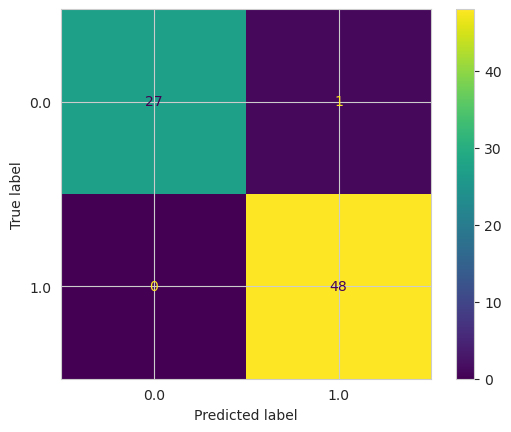

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\n')
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print("\n")
# K-Fold
acc = k_evaluate(10, rf_classifier, new_x, y)

precision :  0.9642857142857143 
 recall : 1.0 
 f1_score : 0.9818181818181818


for fold: 2, accuracy is: 0.9723784526934133
for fold: 3, accuracy is: 0.9842203548085902
for fold: 4, accuracy is: 0.9842509920634921
for fold: 5, accuracy is: 0.9882352941176471
for fold: 6, accuracy is: 0.984311554078996
for fold: 7, accuracy is: 0.9803732303732303
for fold: 8, accuracy is: 0.9842489919354839
for fold: 9, accuracy is: 0.984263820470717
for fold: 10, accuracy is: 0.9843076923076925
Best fit
5 gives accuracy of 0.9882352941176471


# Great Job